
R2: 0.9435803675197592
EVS: 0.9435899882914539
MAE: 15.632737518072853
MSE: 533.4130204370576
Feature ranking:
1. Benadering_U (0.319707) (0.014564)
2. Leeftijd (0.038837) (0.006524)
3. BMI (0.035892) (0.008868)
4. Euroscore1 (0.034346) (0.008763)
5. HLM_N (0.023336) (0.020366)
6. MVR_J (0.020966) (0.006201)
7. Euroscore2 (0.020143) (0.007612)
8. Aorta chirurgie_N (0.020076) (0.017515)
9. Dagdeel_Avond (0.018365) (0.009829)
10. CABG_J (0.018324) (0.007553)
11. HLM_J (0.017573) (0.020490)
12. Aantal anastomosen (0.017196) (0.003890)
13. Casustype_Electief (0.015991) (0.009998)
14. Vervanging aorta ascendens_J (0.015511) (0.010493)
15. Aorta chirurgie_J (0.014311) (0.016018)
16. MVP_J (0.013855) (0.005749)
17. CCS (0.011902) (0.003666)
18. Lobectomie of segmentresectie_J (0.011858) (0.004427)
19. Benadering_Volledige sternotomie (0.011320) (0.003561)
20. NYHA (0.011137) (0.006153)
21. Chirurg_6.00 (0.010876) (0.002325)
22. Bentall procedure_J (0.010597) (0.010884)
23. AVR_J (0.007512) (

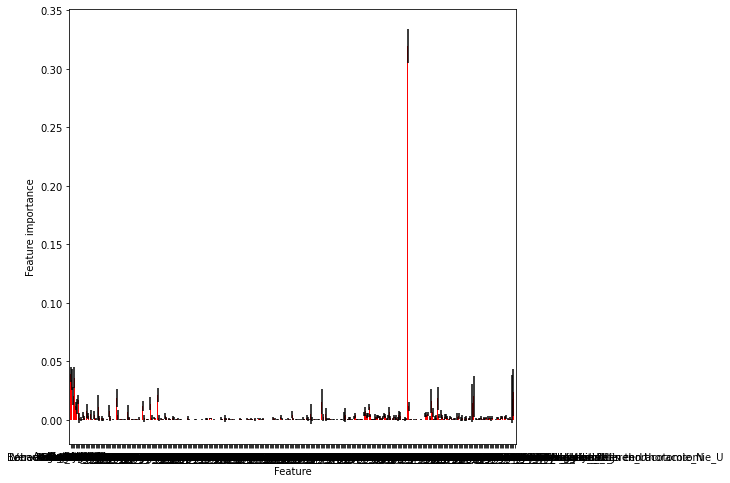

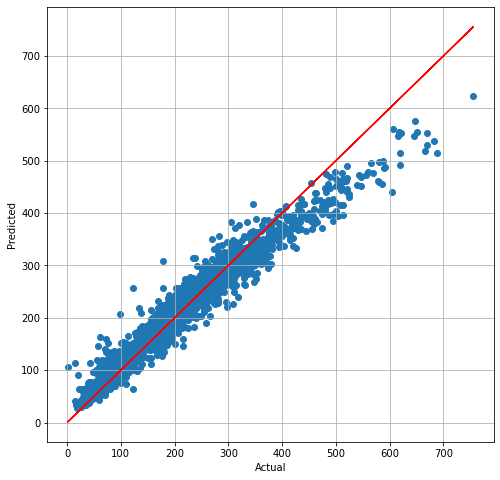

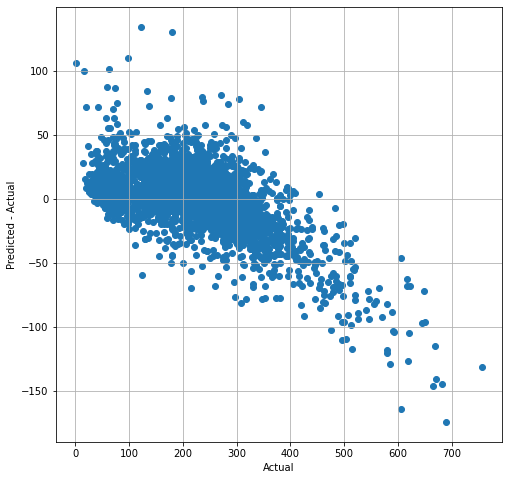

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
import matplotlib.pyplot as plt

X = pd.read_csv('data/data-SNA1.csv')
y = X.pop('Operatieduur').values

model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X, y)

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

predicted = model.predict(X)
print('\nR2:', r2_score(y, predicted))
print('EVS:', explained_variance_score(y, predicted))
print('MAE:', mean_absolute_error(y, predicted))
print('MSE:', mean_squared_error(y, predicted))

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f) (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]], std[indices[f]]))

print(np.mean(np.absolute(predicted - y)))

# Plot the feature importances of the forest
plt.figure(figsize=[8.0,8.0])
plt.ylabel('Feature importance')
plt.xlabel('Feature')
plt.bar(indices, importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices])
plt.xlim([-1, X.shape[1]])
plt.show()


plt.figure(figsize=[8.0,8.0])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(y, predicted)
plt.plot(y, y, color='r')
plt.grid(True)
plt.show()

plt.figure(figsize=[8.0,8.0])
plt.xlabel('Actual')
plt.ylabel('Predicted - Actual')
plt.scatter(y, predicted - y)
plt.grid(True)
plt.show()